Import Required Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Retrieve Datasets as Dataframes

In [49]:
df_2024 = pd.read_csv('Dataset Generation (2024) (Responses) - Form Responses 1.csv')
df_fardina = pd.read_csv('Dataset Generation (Fardina) (Responses) - Form Responses 1.csv')
df_max = pd.read_csv('Dataset Generation (Max) (Responses) - Form Responses 1.csv')

In [50]:
df_2024.drop_duplicates(inplace=True)
df_fardina.drop_duplicates(inplace=True)
df_max.drop_duplicates(inplace=True)

df_2024.dropna(inplace=True)
df_fardina.dropna(inplace=True)
df_max.dropna(inplace=True)

short_cols = ['Time', 'Year', 'Age', 'Politics of Parents', 'Politics of Self', 'Spirituality', 'Gender', 'Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q3: Trust Fund Split 50/50', 'Q4: Schooling Seperate Finances', 'Q5: Lost Cat, No Reward', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q10: Expensive School, Cheap Career', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']  

df_fardina_non_priming = pd.DataFrame()
df_fardina_non_priming[df_fardina.columns.to_list()[0:7] + df_fardina.columns.to_list()[8:]] = df_fardina[df_fardina.columns.to_list()[0:7] + df_fardina.columns.to_list()[8:]]

df_fardina['How old are you?'] = df_fardina['How old are you?'].apply(func=lambda x: int(x) if x != '50+' else x)
df_max['How old are you?'] = df_max['How old are you?'].apply(func=lambda x: int(x) if x != '50+' else x)

fardina_cols = df_fardina_non_priming.columns.to_list()
max_cols = df_max.columns.to_list()
fardina_col_mapping = dict(zip(fardina_cols, short_cols))
max_col_mapping = dict(zip(max_cols, short_cols))

df_fardina_final = df_fardina_non_priming.rename(columns=fardina_col_mapping)
df_max_final = df_max.rename(columns=max_col_mapping)

df_2023_final = pd.concat([df_fardina_final, df_max_final])
df_2023_final['Gender'] = df_2023_final['Gender'].apply(func=lambda s: s.replace('Famale', 'Female') if isinstance(s, str) else s)

str_replace = lambda s: s.replace('religious', 'spiritual') if isinstance(s, str) else s
df_2024['How would you rate your religiousness?'] = df_2024['How would you rate your religiousness?'].apply(func=str_replace)
df_2024['How old are you?'] = df_2024['How old are you?'].apply(func=lambda x: int(x) if x != '50+' else x)

d2024_cols = df_2024.columns.to_list()
d2024_col_mapping = dict(zip(d2024_cols, short_cols))
df_2024_final = df_2024.rename(columns=d2024_col_mapping)

df_all = pd.concat([df_2023_final, df_2024_final])
df_all['Year'] = df_all['Year'].apply(func=lambda s: s.replace('Other', 'Graduate Student'))

df_fardina_priming_final = df_fardina_final.copy()
df_fardina_priming_final['Compassionate'] = df_fardina['Would you describe yourself as compassionate?']

c:\Users\golde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0:
["My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?", "My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?", "My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without 

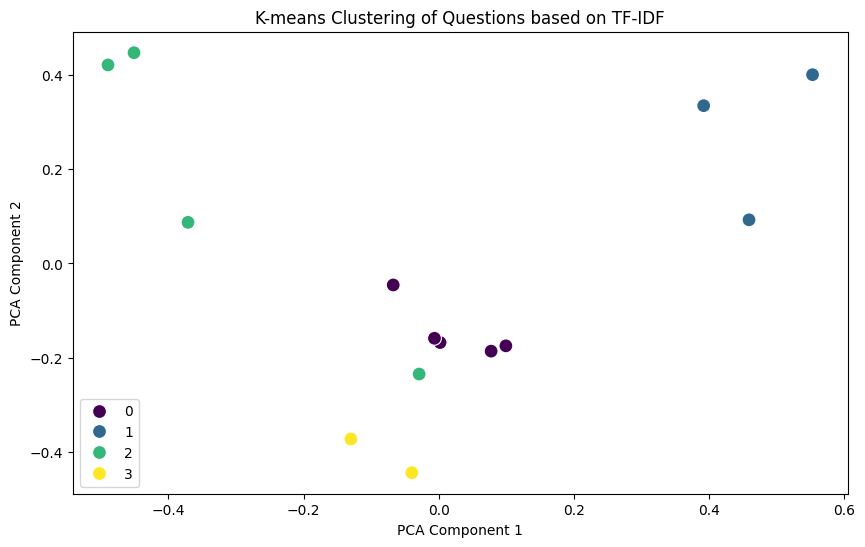

In [51]:
# Sample list of questions as they appear in your data (e.g., Q1, Q2, ..., Q14)
questions = max_cols[7:]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Step 2: Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Step 3: Analyze the clusters
clusters = kmeans.labels_

# Create a DataFrame with the questions and their assigned clusters
df_clusters = pd.DataFrame({'Question': questions, 'Cluster': clusters})

# Display the clustered questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters[df_clusters['Cluster'] == cluster]['Question'].tolist())


# Visualize the TF-IDF vectors in 2D using PCA for better understanding
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_tfidf[:, 0], y=reduced_tfidf[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-means Clustering of Questions based on TF-IDF')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

c:\Users\golde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\golde\AppData\Local\Temp\ipykernel_41288\2707131864.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'bo-', color='blue', marker='o')
C:\Users\golde\AppData\Local\Temp\ipykernel_41288\2707131864.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'bo-', color='blue', marker='o')


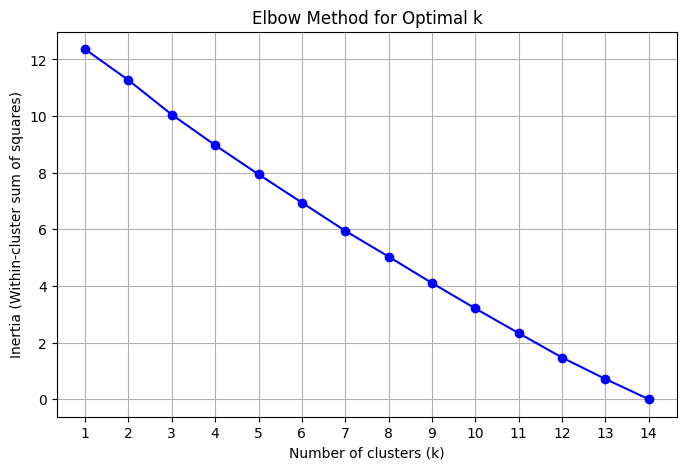

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have a TF-IDF matrix or any other feature matrix (e.g., question_vectors)
X = tfidf_matrix  # Replace this with your actual data matrix

# Step 1: Define range of k values to test
k_values = range(1, 15)  # Testing k from 1 to 10

# Step 2: Fit K-means models for each k and store the inertia (WCSS) values
inertia = []  # List to store the WCSS (inertia) for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the inertia (within-cluster sum of squares)

# Step 3: Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', color='blue', marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [53]:
df_clusters["Mapped Question"] = df_clusters["Question"].apply(func=lambda s: max_col_mapping[s])

In [54]:
df_clusters

,Question,Cluster,Mapped Question
0,My girlfriend is a doctor. Lately she's been c...,0,Q1: Ignored Knee Pain
1,My daughter is getting married soon. I only le...,0,Q2: Rejected Aisle Walk
2,I'm a trust fund kid; I get a healthy 'allowan...,3,Q3: Trust Fund Split 50/50
3,"My wife and I have separate finances, but I pa...",1,Q4: Schooling Seperate Finances
4,I saw a poster for a lost cat advertising a 50...,2,"Q5: Lost Cat, No Reward"
5,My sister's nine year old daughter is poorly b...,0,Q6: Surprisig Child Drop-Off
6,My parents want us to come out for their anniv...,0,Q7: Business Class Over Kids
7,"I'm a single mom with four kids, one of whom h...",2,"Q8: Single Parent, Four Kids"
8,I have a child with a mother who never wanted ...,2,Q9: Split Spouse Child Support
9,One of my children wants to go to an expensive...,1,"Q10: Expensive School, Cheap Career"


In [55]:
# Display the clustered mapped questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters[df_clusters['Cluster'] == cluster]['Mapped Question'].tolist())


Cluster 0:
['Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q14: Rejected Dyed Hair']

Cluster 1:
['Q4: Schooling Seperate Finances', 'Q10: Expensive School, Cheap Career', 'Q13: Pregnant Wife, No Drinks']

Cluster 2:
['Q5: Lost Cat, No Reward', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q11: Ex Wedding Invitation Revoked']

Cluster 3:
['Q3: Trust Fund Split 50/50', 'Q12: Relatives Unapprove Wedding']


c:\Users\golde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0:
['Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q14: Rejected Dyed Hair']

Cluster 1:
['Q4: Schooling Seperate Finances', 'Q10: Expensive School, Cheap Career', 'Q13: Pregnant Wife, No Drinks']

Cluster 2:
['Q3: Trust Fund Split 50/50', 'Q5: Lost Cat, No Reward', 'Q12: Relatives Unapprove Wedding']

Cluster 3:
['Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q11: Ex Wedding Invitation Revoked']


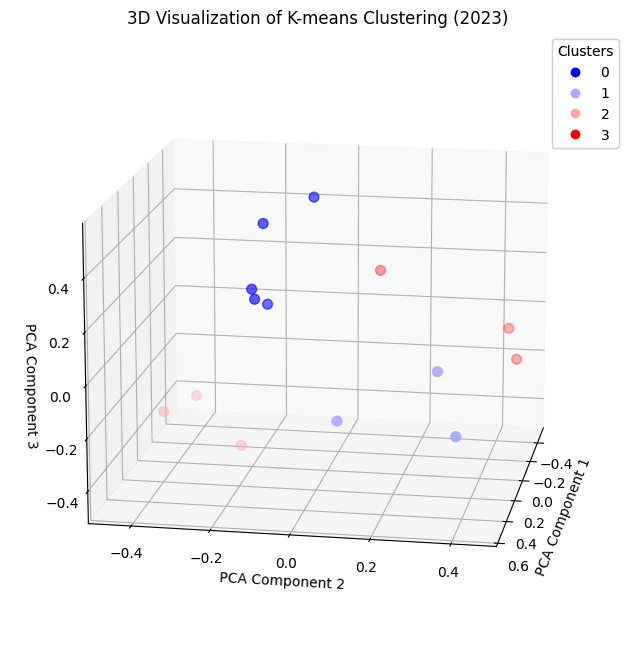

In [135]:
from mpl_toolkits.mplot3d import Axes3D

# Sample list of questions as they appear in your data (e.g., Q1, Q2, ..., Q14)
questions = max_cols[7:]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Visualize the TF-IDF vectors in 2D using PCA for better understanding
pca = PCA(n_components=3)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

# Step 2: Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_tfidf)

# Step 3: Analyze the clusters
clusters = kmeans.labels_

# Create a DataFrame with the questions and their assigned clusters
df_clusters2 = pd.DataFrame({'Question': questions, 
                            'Cluster': clusters,
                            'PCA1': reduced_tfidf[:, 0], 
                            'PCA2': reduced_tfidf[:, 1], 
                            'PCA3': reduced_tfidf[:, 2]})

df_clusters2["Mapped Question"] = df_clusters2["Question"].apply(func=lambda s: max_col_mapping[s])

d2023_cluster_lst = []
# Display the clustered questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())
    d2023_cluster_lst.append(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())


# Step 4: Visualize the 3D K-means clustering
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df_clusters2['PCA1'], df_clusters2['PCA2'], df_clusters2['PCA3'], 
                     c=df_clusters2['Cluster'], cmap='bwr', s=50)

# Set labels and title
ax.set_title('3D Visualization of K-means Clustering (2023)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Create a legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.view_init(elev = 15,azim=10) 

plt.show()

c:\Users\golde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0:
['Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q11: Ex Wedding Invitation Revoked']

Cluster 1:
['Q1: Ignored Knee Pain', 'Q3: Trust Fund Split 50/50', 'Q5: Lost Cat, No Reward', 'Q7: Business Class Over Kids', 'Q12: Relatives Unapprove Wedding']

Cluster 2:
['Q4: Schooling Seperate Finances', 'Q6: Surprisig Child Drop-Off', 'Q10: Expensive School, Cheap Career']

Cluster 3:
['Q2: Rejected Aisle Walk', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']


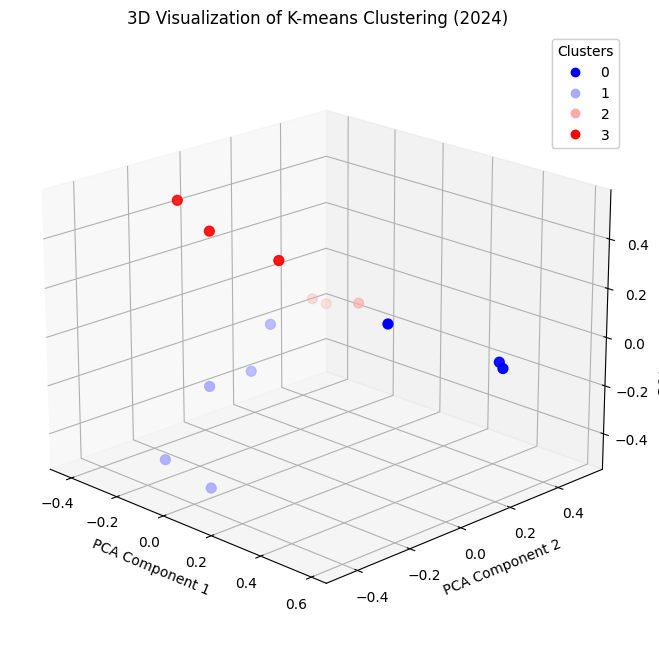

In [134]:
from mpl_toolkits.mplot3d import Axes3D

# Sample list of questions as they appear in your data (e.g., Q1, Q2, ..., Q14)
questions = d2024_cols[7:]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Visualize the TF-IDF vectors in 2D using PCA for better understanding
pca = PCA(n_components=3)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

# Step 2: Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_tfidf)

# Step 3: Analyze the clusters
clusters = kmeans.labels_

# Create a DataFrame with the questions and their assigned clusters
df_clusters2 = pd.DataFrame({'Question': questions, 
                            'Cluster': clusters,
                            'PCA1': reduced_tfidf[:, 0], 
                            'PCA2': reduced_tfidf[:, 1], 
                            'PCA3': reduced_tfidf[:, 2]})

df_clusters2["Mapped Question"] = df_clusters2["Question"].apply(func=lambda s: d2024_col_mapping[s])

d2024_cluster_lst = []
# Display the clustered questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())
    d2024_cluster_lst.append(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())


# Step 4: Visualize the 3D K-means clustering
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df_clusters2['PCA1'], df_clusters2['PCA2'], df_clusters2['PCA3'], 
                     c=df_clusters2['Cluster'], cmap='bwr', s=50)

# Set labels and title
ax.set_title('3D Visualization of K-means Clustering (2024)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Create a legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.view_init(elev=20
             , azim=-45) 

plt.show()

In [58]:
d2024_cluster_lst

[['Q8: Single Parent, Four Kids',
  'Q9: Split Spouse Child Support',
  'Q11: Ex Wedding Invitation Revoked'],
 ['Q1: Ignored Knee Pain',
  'Q3: Trust Fund Split 50/50',
  'Q5: Lost Cat, No Reward',
  'Q7: Business Class Over Kids',
  'Q12: Relatives Unapprove Wedding'],
 ['Q4: Schooling Seperate Finances',
  'Q6: Surprisig Child Drop-Off',
  'Q10: Expensive School, Cheap Career'],
 ['Q2: Rejected Aisle Walk',
  'Q13: Pregnant Wife, No Drinks',
  'Q14: Rejected Dyed Hair']]

In [65]:
d2023_cluster_lst.reverse()

d2023_cluster_lst

[['Q8: Single Parent, Four Kids',
  'Q9: Split Spouse Child Support',
  'Q11: Ex Wedding Invitation Revoked'],
 ['Q3: Trust Fund Split 50/50',
  'Q5: Lost Cat, No Reward',
  'Q12: Relatives Unapprove Wedding'],
 ['Q4: Schooling Seperate Finances',
  'Q10: Expensive School, Cheap Career',
  'Q13: Pregnant Wife, No Drinks'],
 ['Q1: Ignored Knee Pain',
  'Q2: Rejected Aisle Walk',
  'Q6: Surprisig Child Drop-Off',
  'Q7: Business Class Over Kids',
  'Q14: Rejected Dyed Hair']]

In [66]:
res = []
for i in range(0,4):
    set1 = set(d2024_cluster_lst[i])
    set2 = set(d2023_cluster_lst[i])
    res.append(set1.intersection(set2))

res


[{'Q11: Ex Wedding Invitation Revoked',
  'Q8: Single Parent, Four Kids',
  'Q9: Split Spouse Child Support'},
 {'Q12: Relatives Unapprove Wedding',
  'Q3: Trust Fund Split 50/50',
  'Q5: Lost Cat, No Reward'},
 {'Q10: Expensive School, Cheap Career', 'Q4: Schooling Seperate Finances'},
 {'Q14: Rejected Dyed Hair', 'Q2: Rejected Aisle Walk'}]

In [73]:
max_cols[7+11:8+11]

["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"]